# Random Forest Regression Model

**This note book do a random forest regression regression model on the data**

In [3]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [4]:
# read in the data
df_pickup_JFK = pd.read_csv('../data/curated/JFK_pickup_data.csv')
df_pickup_JFK = df_pickup_JFK.drop('tip_ratio', axis = 1)
df_pickup_JFK.head()


,trip_duration,weekend,weekday,[0-1],[1-2],[2-3],[3-4],[4-5],[5-6],[6-7],...,[19-20],[20-21],[21-22],[22-23],morning_rush,evening_rush,trip_distance,total_surcharge,fare_amount,tip_amount
0,29.283333,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,18.20,6.92,52.0,0.00
1,22.616667,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.93,1.30,30.0,6.26
2,10.650000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4.30,1.30,14.5,3.95
3,30.350000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,18.39,1.30,50.5,10.36
4,30.750000,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,23.47,1.30,61.5,12.56


# Parameter Tuning

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define target variable and predictor variables
X = df_pickup_JFK.drop('tip_amount', axis=1)
y = df_pickup_JFK['tip_amount']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Given parameters, with some modifications for demonstration purposes
random_forest_tuning = RandomForestRegressor(random_state=42)
param_grid = {
   'n_estimators': [50, 100, 200],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'criterion': ['squared_error']
}
# Using GridSearchCV to find the best hyperparameters
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
GSCV.fit(X_train, y_train)

best_params = GSCV.best_params_
best_params

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/phivu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
892 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/phivu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/phivu/.local/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/phivu/.local/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/phivu/.loca

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

# Fit the RFR model with the best parameter

In [6]:
# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(
    criterion ='squared_error',
    max_depth = 10,
    max_features='sqrt',
    min_samples_leaf= 4,
    min_samples_split = 10,
    n_estimators = 200,
    random_state=42
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2

(14.115057964391236, 3.757001193024995, 2.5591645947567625, 0.2738356062915781)

**Bar plots of feature importance**

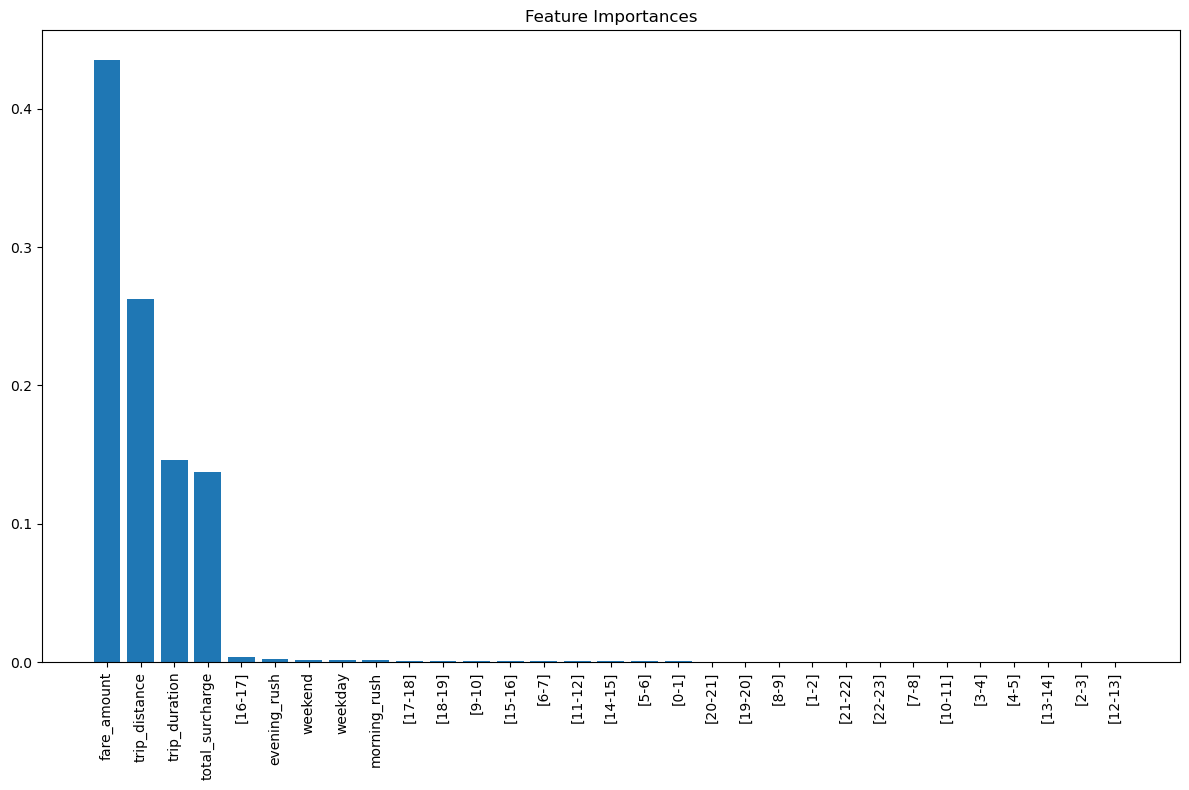

In [7]:
# Feature Importances visualization
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices], align="center")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/features_importance_RFR.png')
plt.show()

**Determining the Out of Bag Error**

In [8]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

0.13851716210589105


**Plots actual vs. predicted values**

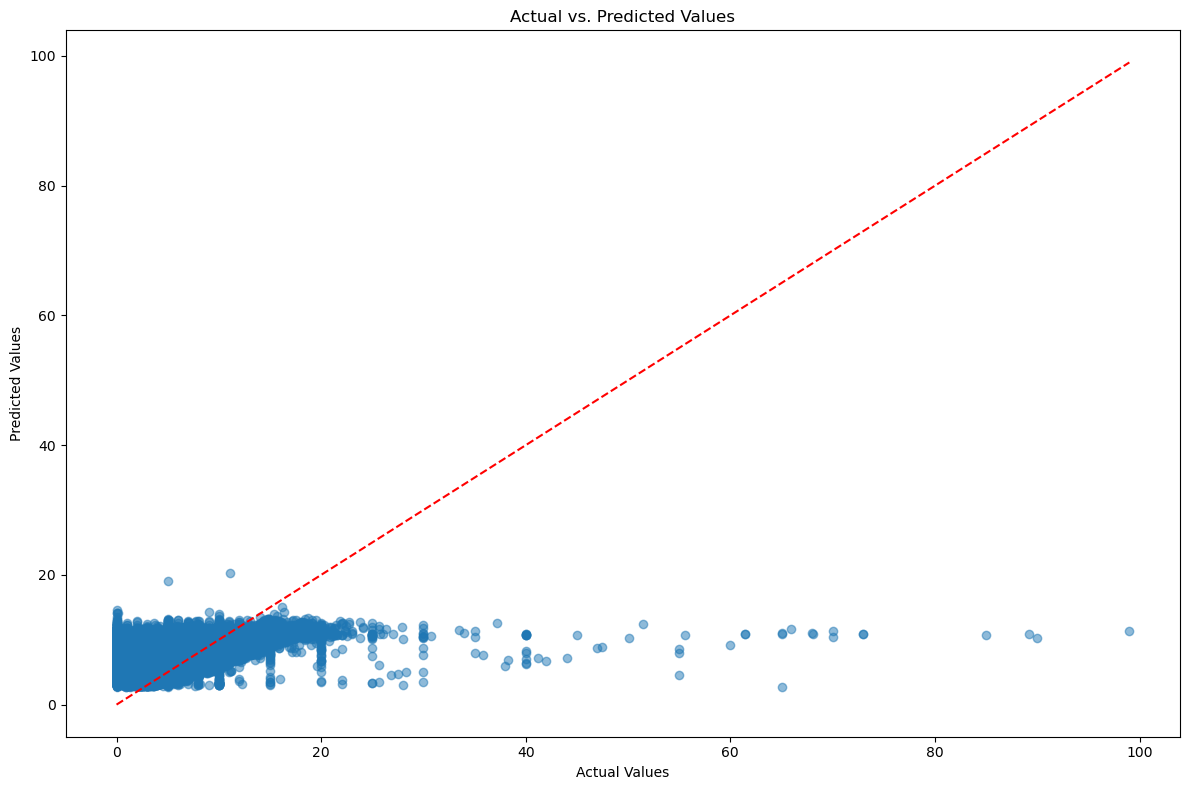

In [9]:
# Predicted vs. Actual values visualization
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.tight_layout()
plt.savefig('../plots/predicted_vs_actual_RFR.png')
plt.show()

**Residual Analysis**

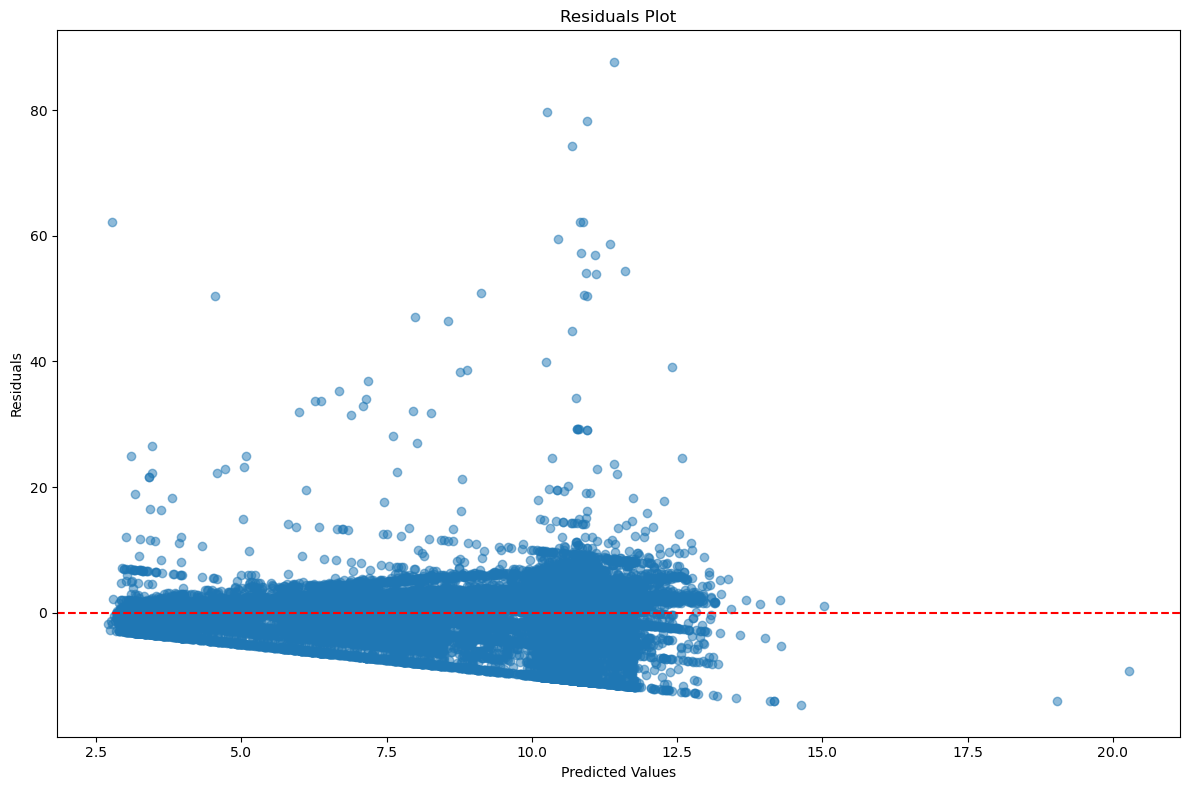

In [10]:
# 1. Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.savefig('../plots/residual_RFR.png')
plt.show()

**Tree Visualization**

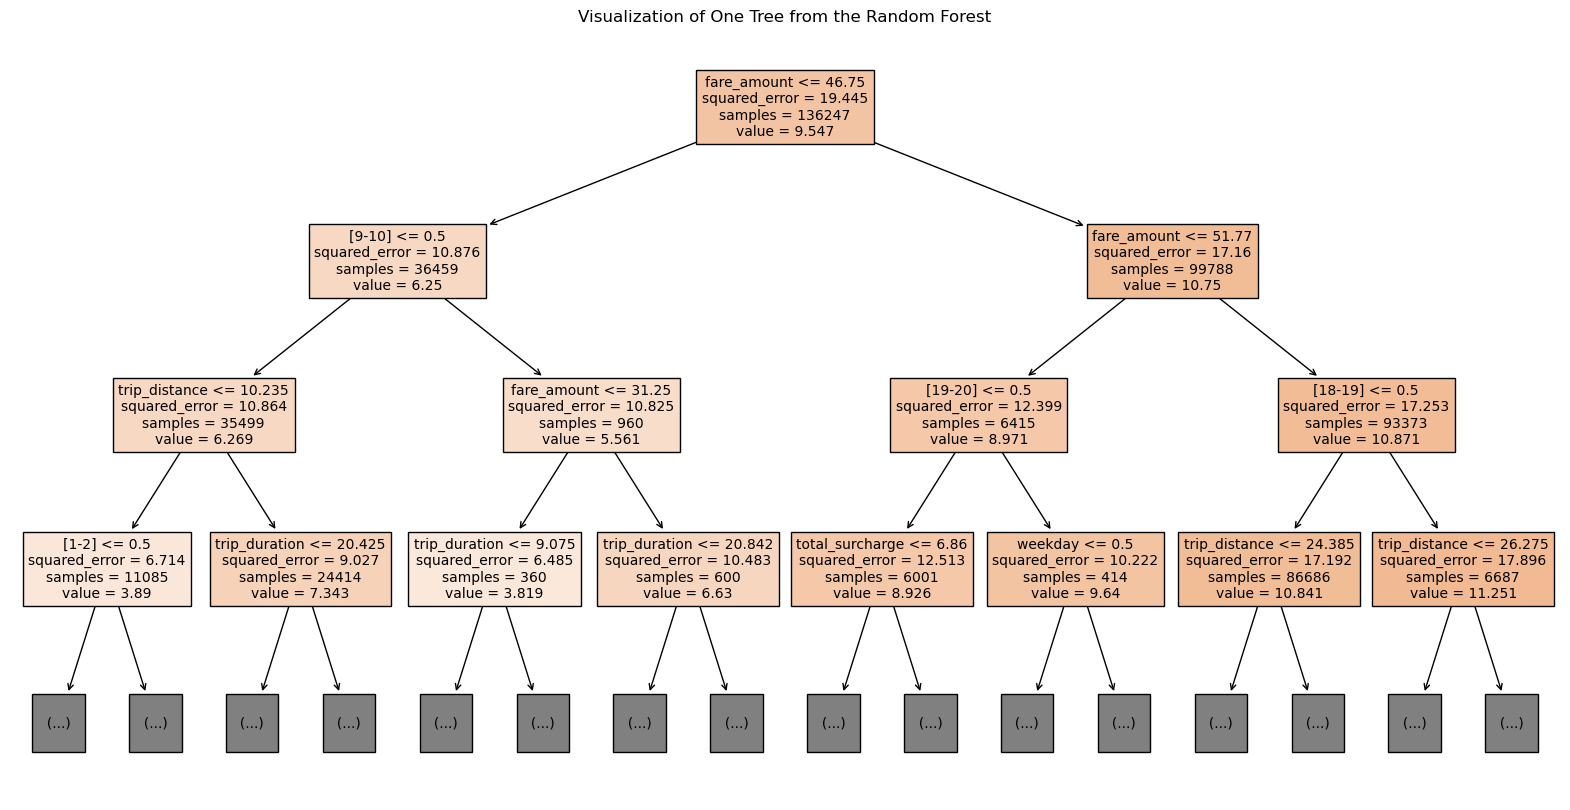

In [11]:
from sklearn.tree import plot_tree

# Let's visualize the first tree from the Random Forest

# Convert X.columns to a list
feature_names_list = X.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(rf_regressor.estimators_[0], filled=True, feature_names=feature_names_list, max_depth=3, fontsize=10)
plt.title("Visualization of One Tree from the Random Forest")
plt.savefig('../plots/first_tree_RFR.png')
plt.show()

# Incorporate with flight data

In [12]:
df_flights = pd.read_csv('../data/curated/JFK_arrival_flight_data.csv')
df_flights.head()

,flight_id,departure_airport,arrival_airport,arrival_hour,[0-1],[1-2],[2-3],[3-4],[4-5],[5-6],...,[14-15],[15-16],[16-17],[17-18],[18-19],[19-20],[20-21],[21-22],[22-23],elapsed_time_flight_minutes
0,0,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
1,1,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
2,2,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
3,3,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89
4,4,IAD,JFK,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,84


**Fit RFR with flight data incorporated, using best parameter**

In [13]:
# Defining the hourly columns based on previous discussions
hourly_cols = ['[0-1]', '[1-2]', '[2-3]', '[3-4]', '[4-5]', '[5-6]', '[6-7]', '[7-8]', '[8-9]', '[9-10]', 
               '[10-11]', '[11-12]', '[12-13]', '[13-14]', '[14-15]', '[15-16]', '[16-17]', '[17-18]', 
               '[18-19]', '[19-20]', '[20-21]', '[21-22]', '[22-23]']

# Aggregate the flight data by hour to compute the total number of flights arriving at JFK
flight_counts = df_flights[hourly_cols].sum()

# Convert the aggregated data to a DataFrame for merging
df_flight_counts = pd.DataFrame(flight_counts).reset_index()
df_flight_counts.columns = ['hour_bin', 'total_flights']

# Melt the taxi pickup data to long format for easier merging
df_pickup_melted = df_pickup_JFK.melt(id_vars=['tip_amount', 'trip_duration', 'weekend', 'weekday', 'trip_distance', 
                                               'total_surcharge', 'fare_amount', 'morning_rush', 'evening_rush'],
                                      value_vars=hourly_cols, var_name='hour_bin', value_name='hour_flag')

# Merge the melted taxi pickup data with the flight counts
df_combined_new = pd.merge(df_pickup_melted, df_flight_counts, on='hour_bin', how='left')

# Filter only rows where hour_flag is 1 (indicating valid records for that hour)
df_combined_new = df_combined_new[df_combined_new['hour_flag'] == 1].drop(columns=['hour_bin', 'hour_flag'])

# Split the combined dataset into predictors and target variable
X_combined_new = df_combined_new.drop('tip_amount', axis=1)
y_combined_new = df_combined_new['tip_amount']

# Split the data into training and testing sets (80% training, 20% testing)
X_train_combined_new, X_test_combined_new, y_train_combined_new, y_test_combined_new = train_test_split(X_combined_new, y_combined_new, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor with the new combined dataset
rf_regressor_combined_new = RandomForestRegressor(
    criterion ='squared_error',
    max_depth = 10,
    max_features='sqrt',
    min_samples_leaf= 4,
    min_samples_split = 10,
    n_estimators = 200,
    random_state=42
)

# Train the model
rf_regressor_combined_new.fit(X_train_combined_new, y_train_combined_new)

# Predict on the new combined test set
y_pred_combined_new = rf_regressor_combined_new.predict(X_test_combined_new)

# Evaluate the model's performance
mse_combined_new = mean_squared_error(y_test_combined_new, y_pred_combined_new)
rmse_combined_new = mean_squared_error(y_test_combined_new, y_pred_combined_new, squared=False)
mae_combined_new = mean_absolute_error(y_test_combined_new, y_pred_combined_new)
r2_combined_new = r2_score(y_test_combined_new, y_pred_combined_new)

mse_combined_new, rmse_combined_new, mae_combined_new, r2_combined_new


(13.464489020591198, 3.669398999916907, 2.538041204471875, 0.28337449170394424)